Connecting to Google Drive to download the dataset

In [1]:
# Import PyDrive and libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
# Downloading the file based on its file ID
file_id = '1eNErv1QejpBuwabvt7nLVQtjVgcVCLYp'
downloaded = drive.CreateFile({'id':file_id})

downloaded.GetContentFile('tweet_data.csv')

Loading the Dataset and Analysing

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("tweet_data.csv")

In [5]:
df.sample(10)

,textID,tweet_text,sentiment
15367,1752475515,&quot;i hear its wonderful in california.&quot;,positive
16283,1752984235,@aeche We didn't...but we did have to wait a g...,positive
16095,1752873961,Going downstairs for more coffee and socialisi...,positive
11426,1694814951,@lorenanne I look forward to having one very soon,positive
15914,1752797345,"@slicksean I'd love that. And, don't think of ...",positive
7061,1964691187,"I wanna go home, but I can't cause the custome...",negative
13859,1751361334,i jus love doin night shifts...will be done in...,positive
12538,1695545673,hope your weekend was fabulous do anything in...,positive
1838,1960125646,I KnO they're my guilty pleasure like shopping...,negative
8050,1965503196,Im mad cuz i cant get any picture to work.,negative


In [6]:
df.shape

(18727, 3)

In [7]:
df.describe()

,textID
count,1.872700e+04
mean,1.847472e+09
std,1.182774e+08
min,1.693956e+09
25%,1.751645e+09
50%,1.957034e+09
75%,1.962836e+09
max,1.966441e+09


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18727 entries, 0 to 18726
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   textID      18727 non-null  int64 
 1   tweet_text  18727 non-null  object
 2   sentiment   18727 non-null  object
dtypes: int64(1), object(2)
memory usage: 439.0+ KB


In [9]:
df.isnull()

,textID,tweet_text,sentiment
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
18722,False,False,False
18723,False,False,False
18724,False,False,False
18725,False,False,False


In [10]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [11]:
# Print a tweet and its sentiment based on tweet id
tweet_id = 4468
tweet = df.iloc[tweet_id]

In [12]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Crap, nearly forgot my PIN  I shouldn't try to learn anything new in the future lest it push out more vital information.
Tweet sentiment: negative


Data Visualtisation

In [13]:
import matplotlib.pyplot as plt

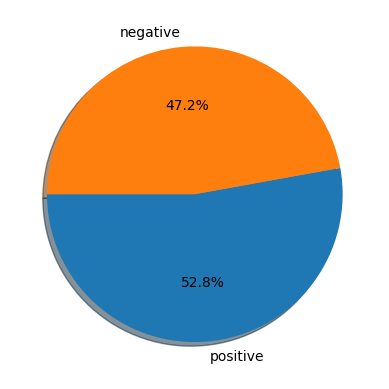

In [14]:
sentiment_count = df["sentiment"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', shadow=True,startangle=180)
plt.show()

In [15]:
print("Number of Positive Tweets in the dataset: {}".format(df[df['sentiment']=="positive"].count()[0]))
print("Number of Negative Tweets in the dataset: {}".format(df[df['sentiment']=="negative"].count()[0]))

Number of Positive Tweets in the dataset: 9897
Number of Negative Tweets in the dataset: 8830


Quick Overview of the most recurrent words in the dataset(in text corpus)

In [16]:
# Worldclouds package is very useful to get a quick overview of the most recurrent words in the text corpus
from wordcloud import WordCloud

In [17]:
pos_tweets = df[df["sentiment"]=="positive"]

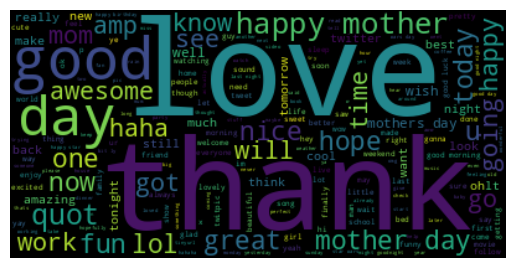

In [18]:
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

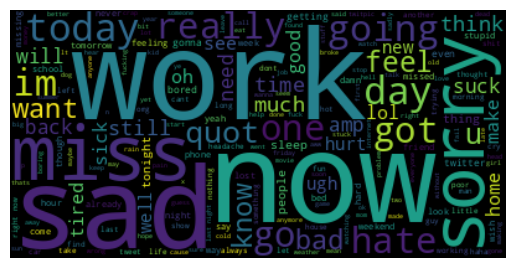

In [19]:
neg_tweets = df[df["sentiment"]=="negative"]
txt = " ".join(tweet.lower() for tweet in neg_tweets["tweet_text"])
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Text Normalisation

In [20]:
# Importing Regex package
import re

In [21]:
# Twitter Feature- Taking a random tweet found in twitter
tweet = "RT @softengproj There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time 👍 https://wikipedia #Information #Learn #Fun"

In [22]:
# Replace occuraencese of RT with a default value
def replace_retweet(tweet, default_replace = ""):
  tweet = re.sub('RT\s+',default_replace,tweet)
  return tweet

In [23]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @softengproj There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time 👍 https://wikipedia #Information #Learn #Fun


In [24]:
#Handling User tags
def replace_user(tweet,default_replace = "twitteruser"):
  tweet = re.sub('\B@\w+',default_replace,tweet)
  return tweet

In [25]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time 👍 https://wikipedia #Information #Learn #Fun


In [26]:
# Handling Emoji
!pip install emoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 5.5 MB/s eta 0:00:00


In [27]:
import emoji

In [28]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [29]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @softengproj There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time :thumbs_up: https://wikipedia #Information #Learn #Fun


In [30]:
# Handling URLs
def replace_url(tweet,default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+',default_replace,tweet)
  return tweet

In [31]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @softengproj There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time 👍  #Information #Learn #Fun


In [32]:
# Handling Hashtags
def replace_hashtag(tweet,default_replace="0:"):
  tweet = re.sub('#',default_replace,tweet)
  return tweet

In [33]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @softengproj There are lot of information in internet, and first website which pops up is the wikipedia when I search for anything most of the time 👍 https://wikipedia 0:Information 0:Learn 0:Fun


In [34]:
# Text Cleaning
# Lets take an example
tweet = "LOOOOOOK at this ... I'd like it so much!"

In [35]:
#Lower case each letter in specific tweet
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [36]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooook at this ... i'd like it so much!


In [37]:
# Replace letters/word repletition with single occurance
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+',r'\1\1',tweet)
  return tweet

In [38]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


In [39]:
# Punctuation Repetition
def punct_repetition(tweet,default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace,tweet)
  return tweet

In [40]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOK at this . I'd like it so much!


In [41]:
# Word Contraction
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.1 MB/s eta 0:00:00


In [42]:
import contractions

In [43]:
# Use contractions_dict to list most common contractions
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [44]:
# Replace contractions with their extended form using contractions dictionary
def _fix_contractions(tweet):
  for k,v in contractions.contractions_dict.items():
    tweet = tweet.replace(k,v)
  return tweet

In [45]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOK at this ... I would like it so much!


In [46]:
# Replace contractions with their extended form using contractions package
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [47]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOK at this ... I would like it so much!


Tokenisation

In [48]:
#Adding NLTK package
!pip install nltk

In [49]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
tweet = "These are 5 different words!"

In [51]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

In [52]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize((tweet))))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


In [53]:
# Custom Tokenization
import string

In [54]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [55]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'myself', 'himself', 'doesn', 'some', 'yourselves', 'then', 'him', 'am', "hadn't", 'their', 'it', 'o', 'which', 'no', 'nor', "shan't", 'won', 'when', 'as', 'your', 'by', 's', 'into', 'needn', 'yours', 'being', 'while', "that'll", "wouldn't", 'what', 'against', 'and', 'in', 'm', 'only', 'more', 'during', "don't", 'but', 'this', 've', "didn't", "you're", 'the', 'his', 'its', 'over', 'has', 'hers', "haven't", 'he', 'do', 'few', 'shouldn', 'these', 'for', 'i', 'each', 'both', 'just', 'did', 'me', 't', 'once', 'd', 'you', 'after', 'didn', 'be', 'ain', 'll', 'had', 'theirs', 'my', 'own', 'now', 'are', 'than', 'we', 'having', 'should', 'so', 'ma', 'couldn', 'too', "it's", 'wasn', 'haven', "doesn't", 'shan', 'hasn', 'off', "hasn't", 're', "she's", 'they', 'or', 'not', 'can', 'of', 'is', 'aren', 'have', 'themselves', 'don', "aren't", 'she', 'up', 'ours', 'an', 'at', 'there', 'same', 'was', "you'd", 'our', 'between', 'them', 'a', 'if', 'above', 'out', 'itself', 'how', 'isn', "mightn't", 'before

In [57]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  token_list = word_tokenize(tweet)
  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

In [58]:
tweet = "These are 5 different words!"

In [59]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_punct=True, keep_alnum=True, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet,keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet,keep_alnum=True)))

Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']
Tweet tokens: ['These', 'are', 'different', 'words']
Tweet tokens: ['These', '5', 'different', 'words']


Stemming

In [60]:
# Stemming is the process of reducing words to their root form
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

In [61]:
# Example
tokens = ['manager','management','managing']

In [62]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer('english')

In [63]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [64]:
print("Porter stems: {}".format(stem_tokens(tokens,porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens,lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens,snowball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


In [65]:
# Checking over-stemming and under-stemming
tokens = ['international','companies','had','interns']

In [66]:
print("Porter stems: {}".format(stem_tokens(tokens,porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens,lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens,snowball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


Lemmatization

In [67]:
# Lemmatization serves the same purpose as Stemming but makes use of word context
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [68]:
tokens = ["international","companies","had","interns"]

In [69]:
# Parts of Speech tagging
word_type = {"international": wordnet.ADJ,
             "companies": wordnet.NOUN,
             "had": wordnet.VERB,
             "interns": wordnet.NOUN
             }

In [70]:
lemmatizer = WordNetLemmatizer()

In [71]:
def lemmatize_tokens(tokens,word_type,lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_type[token]))
  return token_list

In [72]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens,word_type,lemmatizer)
))

Tweet lemma: ['international', 'company', 'have', 'intern']


In [73]:
# Putting it alltogether Tweet processing
complex_tweet = r"""RT @AIOutsider : he loooook,
THis is a big and complex TWeet!!!!👍... We'd be glad if you couldn't normalize it!
Check https://AIOutsider.com and LET ME KNOW!!! #NLP #FUN"""

In [74]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem


Text Vectorisation

In [75]:
# Text Representation
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [76]:
# Convert Sentiments 1 for positive and 0 for negative
df["tokens"] = df["tweet_text"].apply(process_tweet)
df["tweet_sentiment"] = df["sentiment"].apply(lambda i: 1
                                              if i == "positive" else 0)
df.head(10)

,textID,tweet_text,sentiment,tokens,tweet_sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative,"[layin, n, bed, headach, call]",0
1,1956967696,Funeral ceremony...gloomy friday...,negative,"[funer, friday]",0
2,1956967789,wants to hang out with friends SOON!,positive,"[want, hang, friend, soon]",1
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative,"[not, go, prom, bf, not, like, friend]",0
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative,[hmm],0
5,1956969035,@charviray Charlene my love. I miss you,negative,"[charlen, love, miss]",0
6,1956969172,@kelcouch I'm sorry at least it's Friday?,negative,"[sorri, least, friday]",0
7,1956969531,Choked on her retainers,negative,"[choke, retain]",0
8,1956970047,Ugh! I have to beat this stupid song to get to...,negative,"[ugh, beat, stupid, song, get, next, rude]",0
9,1956970424,@BrodyJenner if u watch the hills in london u ...,negative,"[watch, hill, london, realis, tourtur, week, w...",0


In [77]:
X = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist() # Converting dataframe to two lists

In [78]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

In [79]:
# Positive and Negative Frequency
corpus = [["i","love","nlp"], ["i","miss","you"], ["i","love","you"], ["you", "are", "happy", "to", "learn"], ["i","lost","my","computer"], ["i","am","so","sad"]]
sentiment = [1,0,1,1,0,0]

In [80]:
# Bulding the frequency dictionary
def build_freqs(tweet_list,sentiment_list):
  freqs = {}
  for tweet,sentiment in zip(tweet_list,sentiment_list):
    for word in tweet:
      pair = (word,sentiment)
      if pair in freqs:
        freqs[pair] += 1
      else:
        freqs[pair] = 1
  return freqs


In [81]:
freqs = build_freqs(corpus,sentiment)

In [82]:
print(freqs)

{('i', 1): 2, ('love', 1): 2, ('nlp', 1): 1, ('i', 0): 3, ('miss', 0): 1, ('you', 0): 1, ('you', 1): 2, ('are', 1): 1, ('happy', 1): 1, ('to', 1): 1, ('learn', 1): 1, ('lost', 0): 1, ('my', 0): 1, ('computer', 0): 1, ('am', 0): 1, ('so', 0): 1, ('sad', 0): 1}


In [83]:
# Build Frequency dictionary for entire dataset
freqs_all = build_freqs(X,y)

In [84]:
print("Frequency of word 'love' in + tweets: {}".format(freqs_all[("love",1)]))
print("Frequency of word 'love' in - tweets: {}".format(freqs_all[("love",0)]))

Frequency of word 'love' in + tweets: 1358
Frequency of word 'love' in - tweets: 67


In [85]:
def tweet_to_freq(tweet,freqs):
  x = np.zeros((2,))
  for word in tweet:
    if (word,1) in freqs:
      x[0] += freqs[(word,1)]
    if (word,0) in freqs:
      x[1] += freqs[(word,0)]
  return x

In [86]:
print(tweet_to_freq(["i","love","nlp"],freqs))

[5. 3.]


In [87]:
print(tweet_to_freq(["i","love","nlp"],freqs_all))

[1358.   67.]


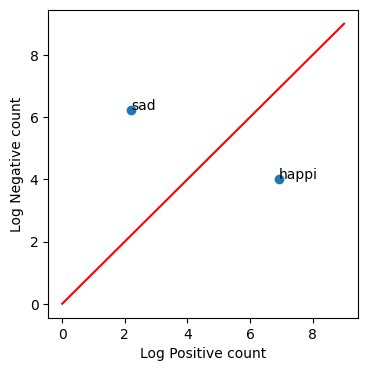

In [88]:
fig, ax = plt.subplots(figsize = (4,4))

word1 = "happi"
word2 = "sad"

def word_features(word,freqs):
  x = np.zeros((2,))
  if (word, 1) in freqs:
    x[0] = np.log(freqs[(word, 1)] + 1)
  if (word, 0) in freqs:
    x[1] = np.log(freqs[(word, 0)] + 1)
  return x

x_axis = [word_features(word, freqs_all)[0] for word in [word1, word2]]
y_axis = [word_features(word, freqs_all)[1] for word in [word1, word2]]

ax.scatter(x_axis,y_axis)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

ax.plot([0,9],[0,9],color = 'red')
plt.text(x_axis[0],y_axis[0],word1)
plt.text(x_axis[1],y_axis[1],word2)
plt.show()

In [89]:
# Bag of words
corpus = [["love","nlp"],["miss","you"],["hate","hate","hate","love"],["happy","love","hate"],["i","lost","my","computer"],["i","am","so","sad"]]

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

In [91]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(tweet_corpus)
  return cv_vect

In [92]:
cv_vect = fit_cv(corpus)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  )


In [93]:
ft = cv_vect.get_feature_names_out()

In [94]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [95]:
# Converting corpus to a matrix
cv_mtx = cv_vect.transform(corpus)

In [96]:
print("Matrix shape is: {}".format(cv_mtx.shape))

Matrix shape is: (6, 13)


In [97]:
# Converting matrix to array
cv_mtx.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0]])

In [98]:
# Transform a new tweet by using vectorizer
new_tweet = [["lost","lost","miss","miss"]]
cv_vect.transform(new_tweet).toarray()

array([[0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0]])

In [99]:
unknown_tweet = [["Jhon","lost","miss","miss"]]
cv_vect.transform(unknown_tweet).toarray()

array([[0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0]])

In [100]:
# Term Frequency and Inverse Document Frequency (TF-IDF)
corpus = [["love","nlp"],["miss","you"],["hate","hate","hate","love"],["happy","love","hate"],["i","lost","my","computer"],["i","am","so","sad"]]

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [102]:
def fit_tfidf(tweet_corpus):
  tf_vect = TfidfVectorizer(preprocessor = lambda x: x,
                            tokenizer = lambda x: x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [103]:
tf_vect = fit_tfidf(corpus)
tf_mtx = tf_vect.transform(corpus)

In [104]:
ft = tf_vect.get_feature_names_out()

In [105]:
print("There are {} features in this corpus".format(len(ft)))
print(ft)

There are 13 features in this corpus
['am' 'computer' 'happy' 'hate' 'i' 'lost' 'love' 'miss' 'my' 'nlp' 'sad'
 'so' 'you']


In [106]:
print(tf_mtx.shape)

(6, 13)


In [107]:
tf_mtx.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.56921261, 0.        , 0.        , 0.82219037,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.70710678],
       [0.        , 0.        , 0.        , 0.96260755, 0.        ,
        0.        , 0.27089981, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.68172171, 0.55902156, 0.        ,
        0.        , 0.47196441, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.52182349, 0.        , 0.        , 0.42790272,
        0.52182349, 0.        , 0.        , 0.52182349, 0.        ,
        0.        , 0.        , 0.        ],
       [0.52182349, 0.        , 0.        , 0.        , 0.42790272,
        0.        , 0.     

In [108]:
new_tweet = [["I","hate","nlp"]]
tf_vect.transform(new_tweet).toarray()

array([[0.        , 0.        , 0.        , 0.6340862 , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.77326237,
        0.        , 0.        , 0.        ]])

Machine Learning Model

In [109]:
print(X)
print(y)

[['layin', 'n', 'bed', 'headach', 'call'], ['funer', 'friday'], ['want', 'hang', 'friend', 'soon'], ['not', 'go', 'prom', 'bf', 'not', 'like', 'friend'], ['hmm'], ['charlen', 'love', 'miss'], ['sorri', 'least', 'friday'], ['choke', 'retain'], ['ugh', 'beat', 'stupid', 'song', 'get', 'next', 'rude'], ['watch', 'hill', 'london', 'realis', 'tourtur', 'week', 'week', 'late', 'watch', 'itonlinelol'], ['sleepi', 'not', 'even', 'late', 'fail'], ['ladi', 'gaga', 'tweet', 'not', 'impress', 'video', 'leak', 'know'], ['convinc', 'alway', 'want', 'signal', 'give', 'think', 'lost', 'anoth', 'friend'], ['way', 'home', 'n', 'deal', 'w', 'underag', 'girl', 'drink', 'gin', 'da', 'bus', 'talk', 'bout', 'feel', 'old'], ['sorri', 'peopl', 'rude', 'isaac', 'get', 'manner', 'know', 'better', 'lewd'], ['damm', 'server', 'still', 'need', 'hit', 'koxper', 'pass'], ['fudg', 'bs', 'whole', 'paper', 'tire', 'ugh', 'hate', 'school', 'time', 'sleep'], ['hate', 'cancer', 'hate', 'hate', 'hate'], ['annoy', 'start', '

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,train_size=0.80)

In [112]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("Train proportion: {:.0%}".format(len(X_train)/(len(X_train)+len(X_test))))

Size of X_train: 14981
Size of y_train: 14981
Size of X_test: 3746
Size of y_test: 3746
Train proportion: 80%


In [113]:
from numpy.random.mtrand import random_integers
id = random_integers(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment: {}".format(y_train[id]))

Train tweet: ['lmao', 'think', 'fuck', 'hate', 'least', 'peopl', 'not', 'unfollow', 'yet', 'loon']
Sentiment: 0


<ipython-input-113-c5338af330f0>:2: DeprecationWarning: This function is deprecated. Please call randint(0, 14981 + 1) instead
  id = random_integers(0,len(X_train))


Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
def fit_lr(X_train,y_train):
  model = LogisticRegression()
  model.fit(X_train,y_train)
  return model

In [116]:
# Positive and Negative Frequency
freqs = build_freqs(X_train,y_train)
X_train_pn = [tweet_to_freq(tweet,freqs) for tweet in X_train]
X_test_pn = [tweet_to_freq(tweet,freqs) for tweet in X_test]

In [117]:
model_lr_pn = fit_lr(X_train_pn,y_train)
print(model_lr_pn.coef_, model_lr_pn.intercept_)

[[ 0.00264627 -0.00194941]] [-0.5597042]


In [118]:
#Count Vector
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  )


In [119]:
model_lr_cv = fit_lr(X_train_cv,y_train)

In [120]:
# TF-IDF
tf = fit_tfidf(X_train)
X_train_tf = tf.transform(X_train)
X_test_tf = tf.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  )


In [121]:
model_lr_tf = fit_lr(X_train_tf,y_train)

Performance Metrics

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [123]:
y_pred_lr_pn = model_lr_pn.predict(X_test_pn)

In [124]:
print("Logistic Regression Model Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred_lr_pn)))

Logistic Regression Model Accuracy: 77.92%


In [125]:
import seaborn

In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr_pn))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1736
           1       0.84      0.72      0.78      2010

    accuracy                           0.78      3746
   macro avg       0.78      0.78      0.78      3746
weighted avg       0.79      0.78      0.78      3746



In [127]:
!pip install matplotlib scikit-learn

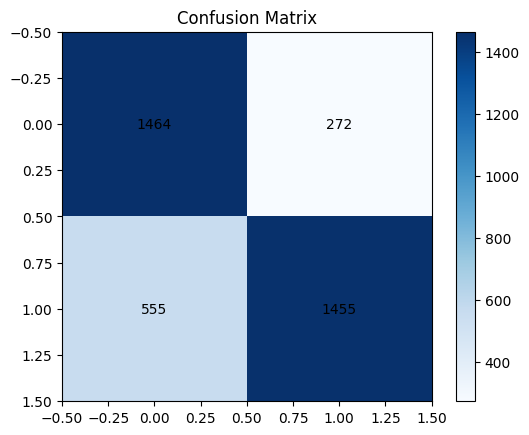

In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_pn = confusion_matrix(y_test, y_pred_lr_pn)
plt.imshow(confusion_pn, cmap='Blues')
for i in range(confusion_pn.shape[0]):
    for j in range(confusion_pn.shape[1]):
        plt.text(j, i, str(confusion_pn[i, j]), ha='center', va='center', color='black')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [129]:
# Bag of words to predict X_test
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [130]:
print("Logistic Regression Model Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred_lr_cv)))

Logistic Regression Model Accuracy: 88.55%


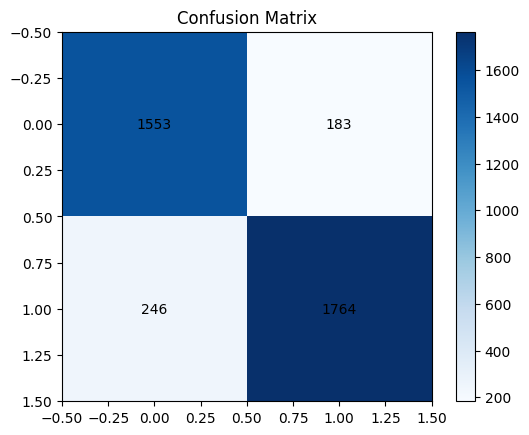

In [131]:
confusion_cv = confusion_matrix(y_test, y_pred_lr_cv)
plt.imshow(confusion_cv, cmap='Blues')
for i in range(confusion_cv.shape[0]):
    for j in range(confusion_cv.shape[1]):
        plt.text(j, i, str(confusion_cv[i, j]), ha='center', va='center', color='black')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()

In [132]:
# TF-IDF
y_pred_lr_tf = model_lr_tf.predict(X_test_tf)

In [133]:
print("Logistic Regression Model Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred_lr_tf)))

Logistic Regression Model Accuracy: 88.65%


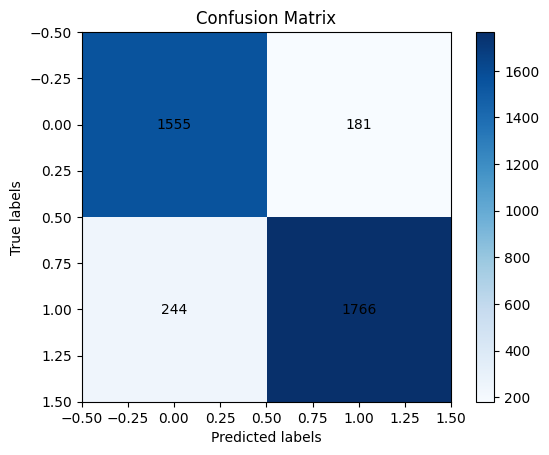

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_tf = confusion_matrix(y_test, y_pred_lr_tf)
plt.imshow(confusion_tf, cmap='Blues')
for i in range(confusion_tf.shape[0]):
    for j in range(confusion_tf.shape[1]):
        plt.text(j, i, str(confusion_tf[i, j]), ha='center', va='center', color='black')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Prediction

In [135]:
your_tweet = """RT @abcd_user: This weather is soooo goood..."""

In [136]:
def predict_tweet(tweet):
  processed_tweet = process_tweet(tweet)
  transformed_tweet = tf.transform([processed_tweet])
  prediction = model_lr_tf.predict(transformed_tweet)

  if prediction == 1:
    return "Prediction is positive statement"
  else:
    return "Prediction is negative statement"

In [137]:
predict_tweet(your_tweet)

'Prediction is positive statement'

In [138]:
another_tweet = """RT @abcd_user We lost the last match, I agree we did'nt practised and wasted our time this time ..."""

In [139]:
predict_tweet(another_tweet)

'Prediction is negative statement'